In [1]:
import sys
sys.path.append(r'C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs')
from datapool_client import DataPool
from UWO_DataAnalysis import helper_functions
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [2]:
%matplotlib inline
dp=DataPool()
for source in tqdm(dp.source.all()['name']):
    try:
        plot_data=helper_functions.plot_packages_received_histogram(source_name=source, start_date='2016-01-01', save_directory=r'C:\Users\steineph\switchdrive\Private\Datenanalyse_test')
    except Exception as e:
        print(e)



You are successfully connected to the database!


  0%|          | 0/163 [00:00<?, ?it/s]

You are successfully connected to the database!


KeyboardInterrupt: 

In [1]:
%matplotlib inline
dp=DataPool()
for source in tqdm(dp.source.all()['name']):
    try:
        helper_functions.plot_timeseries(source_name=source, start_date='2016-01-01', save_directory=r'C:\Users\steineph\switchdrive\Private\Datenanalyse_test')
    except Exception as e:
        print(e)


NameError: name 'DataPool' is not defined

You are successfully connected to the database!


  0%|          | 0/163 [00:00<?, ?it/s]

You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

divide by zero encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

invalid value encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

invalid value encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

invalid value encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

invalid value encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!


C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs\UWO_DataAnalysis\helper_functions.py:27: RuntimeWarning:

invalid value encountered in double_scalars



You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!
You are successfully connected to the database!


KeyboardInterrupt: 

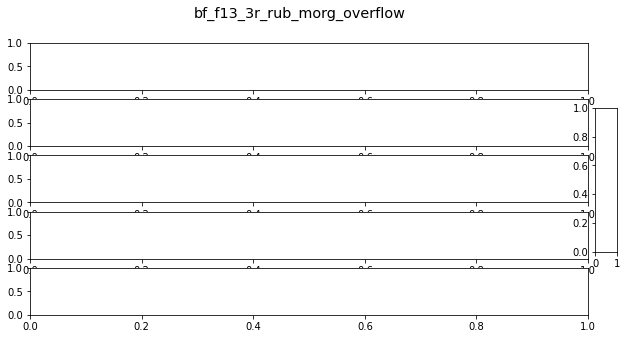

In [3]:
dp=DataPool()
df_all=pd.DataFrame()

for source in tqdm(list(dp.source.all()['name'])):
    savepath=r'C:\Users\steineph\switchdrive\Private\Datenanalyse_test\PSR\{}'.format(source.split('_')[0])
    if not os.path.exists(savepath):
        os.makedirs(savepath)

    if ((source+'.png') not in os.listdir(savepath)) and (source != 'bt_dl942_11_veloweg_sd'):
        fig, ax = plt.subplots(5, sharey=True, figsize=(10, 5))
        fig.suptitle("{}".format(source), fontsize="x-large")
        cbar_ax = fig.add_axes([.91, .3, .03, .4])

        grouped_data0=helper_functions.calculate_PSR(source_name=source, start_date="2016-01-01", resolution='Y', allow_higher_samplingrates=False)
        grouped_data1=helper_functions.calculate_PSR(source_name=source, start_date="2016-01-01", resolution='Q',allow_higher_samplingrates=False)
        grouped_data2=helper_functions.calculate_PSR(source_name=source, start_date="2016-01-01", resolution='M', allow_higher_samplingrates=False)
        grouped_data3=helper_functions.calculate_PSR(source_name=source, start_date="2016-01-01", resolution='W', allow_higher_samplingrates=False)
        grouped_data4=helper_functions.calculate_PSR(source_name=source, start_date="2016-01-01", resolution='D', allow_higher_samplingrates=False)

        grouped_data_long0=pd.pivot(grouped_data0, index='sensor', columns='timestamp', values='normalized_count')
        grouped_data_long1=pd.pivot(grouped_data1, index='sensor', columns='timestamp', values='normalized_count')
        grouped_data_long2=pd.pivot(grouped_data2, index='sensor', columns='timestamp', values='normalized_count')
        grouped_data_long3=pd.pivot(grouped_data3, index='sensor', columns='timestamp', values='normalized_count')
        grouped_data_long4=pd.pivot(grouped_data4, index='sensor', columns='timestamp', values='normalized_count')

        sns.heatmap(data=grouped_data_long0, annot=True, cmap='RdYlGn', vmin=0, vmax=1, ax=ax[0], cbar_ax=cbar_ax)
        sns.heatmap(data=grouped_data_long1, annot=True, cmap='RdYlGn', vmin=0, vmax=1, ax=ax[1], cbar_ax=cbar_ax)
        sns.heatmap(data=grouped_data_long2, annot=False, cmap='RdYlGn', vmin=0, vmax=1, ax=ax[2], cbar_ax=cbar_ax)
        sns.heatmap(data=grouped_data_long3, cmap='RdYlGn', vmin=0, vmax=1, ax=ax[3], cbar_ax=cbar_ax)
        sns.heatmap(data=grouped_data_long4, cmap='RdYlGn', vmin=0, vmax=1, ax=ax[4], cbar_ax=cbar_ax)

        ax[4].set_xticklabels([pd.to_datetime(t.get_text()).strftime('%D') for t in ax[4].get_xticklabels()]);
        ax[0].get_xaxis().set_visible(False)
        ax[1].get_xaxis().set_visible(False)
        ax[2].get_xaxis().set_visible(False)
        ax[3].get_xaxis().set_visible(False)
        
        #ax[0].get_yaxis().set_visible(False)
        #ax[1].get_yaxis().set_visible(False)
        #ax[2].get_yaxis().set_visible(False)
        #ax[3].get_yaxis().set_visible(False)
        #ax[4].get_yaxis().set_visible(False)

        ax[0].set_yticklabels([]) 
        ax[1].set_yticklabels([]) 
        ax[2].set_yticklabels([]) 
        ax[3].set_yticklabels([]) 
        ax[4].set_yticklabels([]) 

        ax[0].tick_params(left=False)
        ax[1].tick_params(left=False)
        ax[2].tick_params(left=False)
        ax[3].tick_params(left=False)
        ax[4].tick_params(left=False)

        ax[0].set_ylabel('Yearly')
        ax[1].set_ylabel('Quartaly')
        ax[2].set_ylabel('Monthly')
        ax[3].set_ylabel('Weekly')
        ax[4].set_ylabel('Daily')

        fig.savefig(os.path.join(savepath, '{}.png'.format(source)), dpi=1000, bbox_inches='tight')
        plt.close('all')
    else:
        continue



In [163]:
dp=DataPool()
df_all=pd.DataFrame()
for source in [dp.source.all()['name']]:

    grouped_data=helper_functions.calculate_PSR(source_name=source, start_date="2021-09-01", resolution='Y', allow_higher_samplingrates=False, )
    df_all=pd.concat([df_all, grouped_data])


['bt_dl953_11e_russikerstr',
 'bl_dl9449_15a_russikerstr',
 'bf_f13_3r_rub_morg_overflow',
 'bf_plsRKBM1101_3r_rub_morg_overflow',
 'bt_dl912_rw137_schutzengasse',
 'bt_dl917_162_luppmenweg',
 'bt_dl954_rw137_schutzengasse',
 'bm_dl329_rub128basin_usterstr',
 'bm_dl290_rubbasin_ara',
 'bl_dl320_597sbw_ara',
 'bl_dl321_48sbw_notuberlauf',
 'bl_dl322_rub128inflow_usterstr',
 'bl_dl323_rub128basin_usterstr',
 'bl_dl324_137_schutzengasse',
 'bf_f08_166_luppmenweg',
 'bf_f04_23_bahnhofstr',
 'bf_f06_11e_russikerstr',
 'bf_f10_22a_bahnhofstr',
 'bf_f11_7_kempttalstr',
 'bl_dl899_inflow_ara',
 'bn_r02_school_chatzenrainstr',
 'bn_r04_airport_speck',
 'bt_dl916_inflow_ara',
 'bt_dl923_166_luppmenweg',
 'bt_dl922_166_luppmenweg',
 'bt_dl924_137_schutzengasse',
 'bt_dl925_581a_wildbach',
 'bt_dl925_581a_wildbach_sd',
 'bt_dl926_rubmorg_inflow',
 'bt_dl927_164_luppmenweg',
 'bt_dl928_164_luppmenweg',
 'bt_dl930_40d_imberg',
 'bt_dl929_164_luppmenweg',
 'bt_dl931_vs22_kempttalstr',
 'bt_dl932_rub1

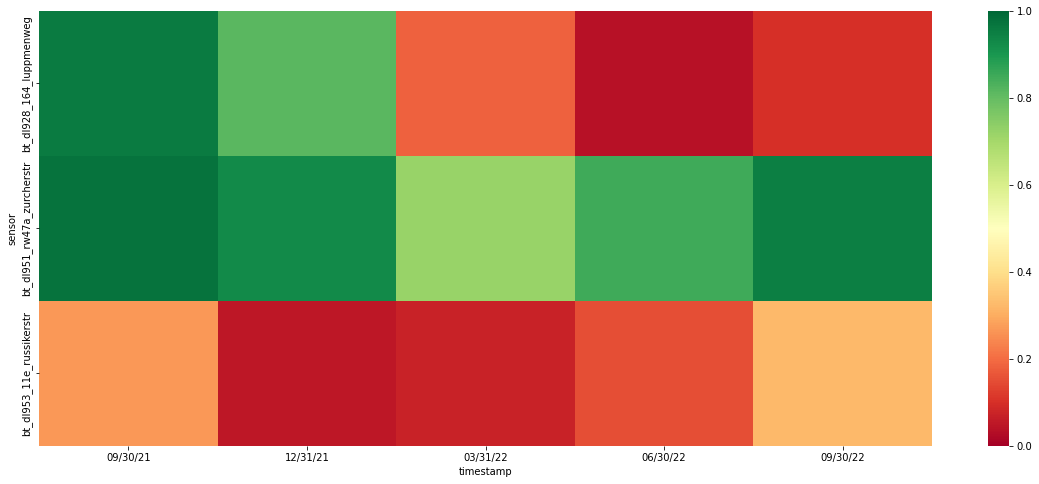

In [117]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 8))
grouped_data_long=pd.pivot(df_all, index='sensor', columns='timestamp', values='normalized_count')
sns.heatmap(data=grouped_data_long, cmap='RdYlGn', vmin=0, vmax=1, ax=ax)
ax.set_xticklabels([pd.to_datetime(t.get_text()).strftime('%D') for t in ax.get_xticklabels()]);